## <b>Loan Prediction<b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>sanction</b> - Is loan sanction or not (1/0)

## Model Building and Evaluation Metrics
Applied Machine learning models

1. KNeighborsClassifier
2. Logistic Regressin
3. Multinomial Naive Bayes
4. RBF-SVM 
5. RandomForestClassifier
6. XGBClassifier


Since this is a binary classification problem, we could use the following 2 popular metrics:

1. Confusion matrix, Precision matrix, Recall matrix
2. f1_score


## Loan Prediction


* Load Data & Packages for model building & preprocessing
* Preprocessing & Missing value imputation
* Select features on the basis of EDA Conclusions & build baseline model
* Decide Evaluation Metric on the basis of business problem
* Build model using all features & compare with baseline

### Loading Packages

In [159]:
#!pip install sklearn_evaluation
#!pip install chart_studio

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import matplotlib.pylab as plt
import matplotlib
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn_evaluation import plot
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## 1. Loading Data

In [ ]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,sanction
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
# shape of data

df.shape

(28382, 21)

In [154]:
# datatypes of each attribute

df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
sanction                            int64
dtype: object

In [ ]:
# describe properties of continuous features

df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,sanction
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [ ]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
sanction                            int64
dtype: object

## 2. Univariate analysis

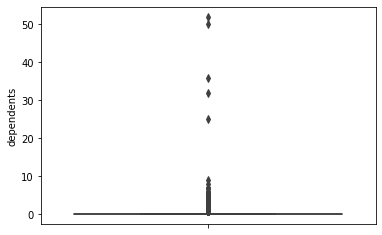

In [ ]:
#Univariate analysis: dependents
sns.boxplot(y="dependents", data =df)
plt.show()

In [ ]:
#calculating dependents values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["dependents"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 1.0
90 percentile value is 3.0
100 percentile value is  nan


In [ ]:
#calculating dependents values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["dependents"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is nan
99.1 percentile value is nan
99.2 percentile value is nan
99.3 percentile value is nan
99.4 percentile value is nan
99.5 percentile value is nan
99.6 percentile value is nan
99.7 percentile value is nan
99.8 percentile value is nan
99.9 percentile value is nan
100 percentile value is  nan


In [ ]:
df[df['dependents']>7.0]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,sanction
1326,1414,3383,35,Male,9.0,self_employed,1004.0,3,307,0.0,...,7527.46,7528.91,8370.82,1279.11,216.28,2112.21,1134.91,7125.57,7953.44,0
3741,3988,293,43,Male,52.0,self_employed,531.0,2,1561,5.0,...,2270.12,1923.59,299.47,286.36,572.07,72.07,47.97,2297.21,2187.11,0
7820,8331,233,41,Male,36.0,salaried,745.0,2,1475,58.0,...,14490.23,13081.65,9164.66,0.10,714.39,0.10,0.10,14550.66,14471.34,0
9082,9688,1412,58,Male,50.0,salaried,1025.0,3,2622,11.0,...,7280.36,5717.36,1260.96,13857.19,0.04,19528.61,0.04,8597.22,7279.26,1
9472,10109,2273,56,Female,8.0,self_employed,1348.0,2,1590,55.0,...,674.62,1686.58,582.64,0.17,6288.64,14.46,6285.89,672.15,3715.73,1
14016,14957,557,30,Male,25.0,self_employed,905.0,2,34,0.0,...,102.01,1526.61,1612.37,13100.21,5949.14,1737.36,3155.14,631.42,442.29,0
23681,25267,191,45,Male,32.0,salaried,345.0,3,2277,62.0,...,1074.70,1455.26,1166.65,0.46,0.46,475.67,488.20,1841.57,1167.09,0


 Here as we can see after dependents>10 there exists some outliers

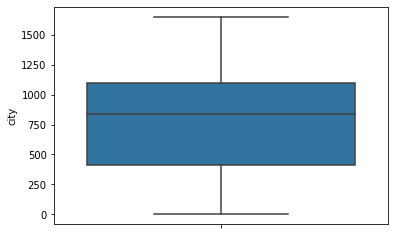

In [ ]:
#Univariate analysis: city
sns.boxplot(y="city", data =df)
plt.show()

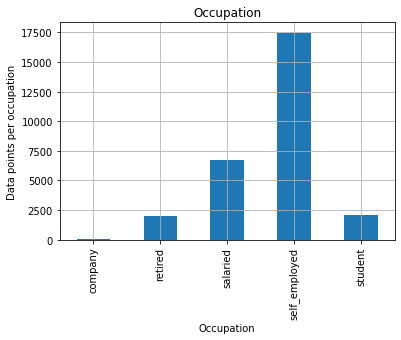

In [ ]:
#Univariate analysis: occupation

occupation_distribution = df['occupation'].value_counts().sort_index()

my_colors = 'rgbkymc'
occupation_distribution.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Data points per occupation')
plt.title('Occupation')
plt.grid()
plt.show()

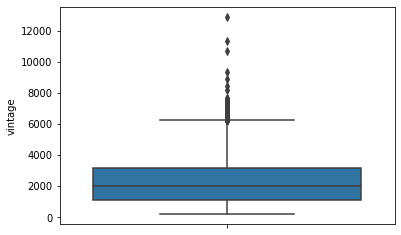

In [ ]:
#Univariate analysis: vintage
sns.boxplot(y="vintage", data =df)
plt.show()

In [ ]:
df['vintage'].min()

180

In [ ]:
#calculating vintage values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["vintage"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 180
10 percentile value is 565
20 percentile value is 931
30 percentile value is 1283
40 percentile value is 1626
50 percentile value is 2018
60 percentile value is 2426
70 percentile value is 2908
80 percentile value is 3721
90 percentile value is 4833
100 percentile value is  12899


In [ ]:
#calculating vintage values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["vintage"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 6705
99.1 percentile value is 6746
99.2 percentile value is 6795
99.3 percentile value is 6842
99.4 percentile value is 6891
99.5 percentile value is 6952
99.6 percentile value is 7025
99.7 percentile value is 7080
99.8 percentile value is 7179
99.9 percentile value is 7352
100 percentile value is  12899


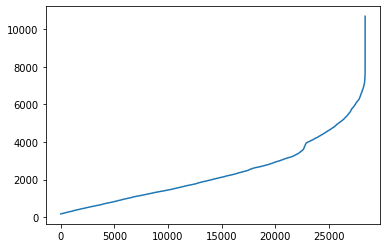

In [ ]:
plt.plot(var[:-2])
plt.show()

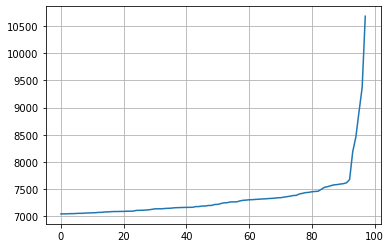

In [ ]:
plt.plot(var[-100:-2])
plt.grid()
plt.show()

 Here as we can see after vintage >7500 there exists some outliers

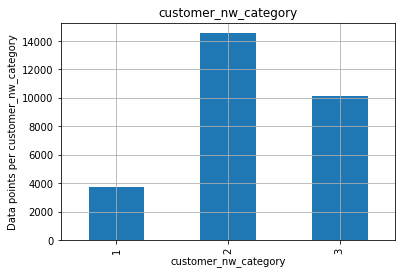

In [ ]:
#Univariate analysis: customer_nw_category

customer_nw_category_distribution = df['customer_nw_category'].value_counts().sort_index()

my_colors = 'rgbkymc'
customer_nw_category_distribution.plot(kind='bar')
plt.xlabel('customer_nw_category')
plt.ylabel('Data points per customer_nw_category')
plt.title('customer_nw_category')
plt.grid()
plt.show()

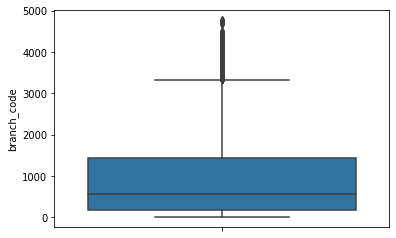

In [ ]:
#Univariate analysis: branch_code
sns.boxplot(y="branch_code", data =df)
plt.show()

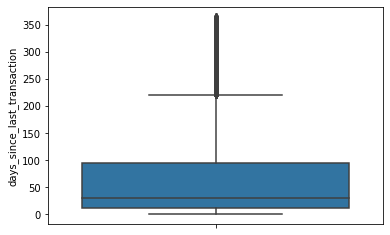

In [ ]:
#Univariate analysis: days_since_last_transaction
sns.boxplot(y="days_since_last_transaction", data =df)
plt.show()

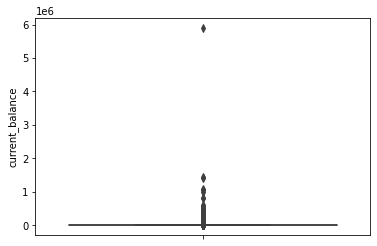

In [ ]:
#Univariate analysis: current_balance
sns.boxplot(y="current_balance", data =df)
plt.show()


In [ ]:
df['current_balance'].min()

-5503.96

In [ ]:
#calculating current_balance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["current_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -5503.96
10 percentile value is 910.54
20 percentile value is 1567.3
30 percentile value is 2032.46
40 percentile value is 2605.86
50 percentile value is 3281.33
60 percentile value is 4249.82
70 percentile value is 5662.76
80 percentile value is 7961.56
90 percentile value is 13526.26
100 percentile value is  5905904.03


In [ ]:
#calculating current_balance values at each percntile 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
for i in np.arange(0.0, 1.1, 0.1):
    var =df["current_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(round(0+i,1) ,var[int(len(var)*(float(0+i)/100))]))
#print("10 percentile value is ",var[-1])

0.0 percentile value is -5503.96
0.1 percentile value is 0.37
0.2 percentile value is 0.98
0.3 percentile value is 4.26
0.4 percentile value is 8.83
0.5 percentile value is 14.71
0.6 percentile value is 18.35
0.7 percentile value is 24.43
0.8 percentile value is 31.83
0.9 percentile value is 39.19
1.0 percentile value is 47.43


In [ ]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["current_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 64900.06
99.1 percentile value is 70226.99
99.2 percentile value is 75209.95
99.3 percentile value is 83227.59
99.4 percentile value is 90730.66
99.5 percentile value is 100903.14
99.6 percentile value is 117354.87
99.7 percentile value is 140326.84
99.8 percentile value is 170713.32
99.9 percentile value is 283002.83
100 percentile value is  5905904.03


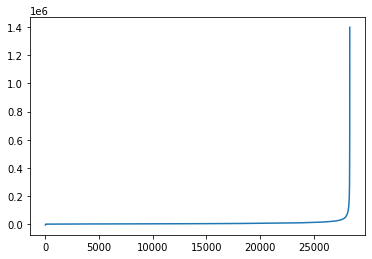

In [ ]:
plt.plot(var[:-2])
plt.show()

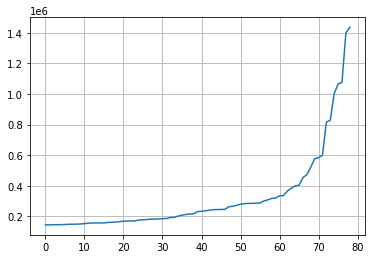

In [ ]:
plt.plot(var[-80:-1])
plt.grid()
plt.show()

 Here as we can see after current_balance>200000 and current_balance < 0 there exists some outliers

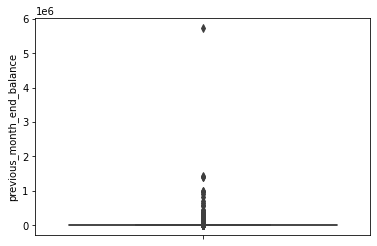

In [ ]:
#Univariate analysis: previous_month_end_balance
sns.boxplot(y="previous_month_end_balance", data =df)
plt.show()

In [ ]:
df['previous_month_end_balance'].min()

-3149.57

In [ ]:
#calculating current_balance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["previous_month_end_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -3149.57
10 percentile value is 1208.56
20 percentile value is 1696.1
30 percentile value is 2152.03
40 percentile value is 2720.0
50 percentile value is 3380.06
60 percentile value is 4308.69
70 percentile value is 5727.95
80 percentile value is 8007.03
90 percentile value is 13345.25
100 percentile value is  5740438.63


In [ ]:
#calculating current_balance values at each percntile 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
for i in np.arange(0.0, 1.1, 0.1):
    var =df["previous_month_end_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(round(0+i,1) ,var[int(len(var)*(float(0+i)/100))]))
#print("10 percentile value is ",var[-1])

0.0 percentile value is -3149.57
0.1 percentile value is 0.43
0.2 percentile value is 1.91
0.3 percentile value is 8.57
0.4 percentile value is 14.45
0.5 percentile value is 21.04
0.6 percentile value is 29.69
0.7 percentile value is 40.97
0.8 percentile value is 54.48
0.9 percentile value is 66.32
1.0 percentile value is 74.0


In [ ]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["previous_month_end_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 66415.93
99.1 percentile value is 70843.36
99.2 percentile value is 76136.54
99.3 percentile value is 84824.32
99.4 percentile value is 90899.56
99.5 percentile value is 100664.31
99.6 percentile value is 114770.01
99.7 percentile value is 139825.17
99.8 percentile value is 170713.32
99.9 percentile value is 280938.79
100 percentile value is  5740438.63


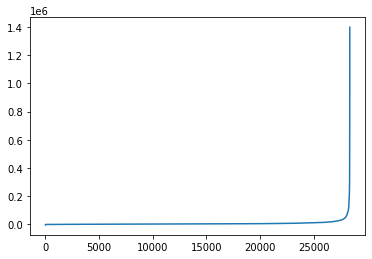

In [ ]:
plt.plot(var[:-2])
plt.show()

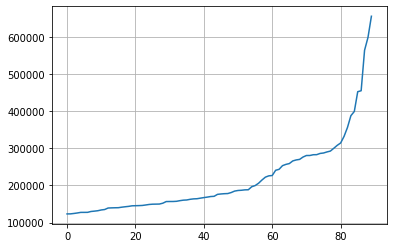

In [ ]:
plt.plot(var[-100:-10])
plt.grid()
plt.show()

 Here as we can see after previous_month_end_balance > 150000 and previous_month_end_balance < 0 there exists some outliers

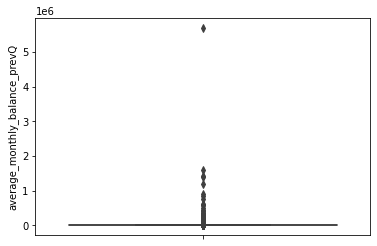

In [ ]:
#Univariate analysis: average_monthly_balance_prevQ
sns.boxplot(y="average_monthly_balance_prevQ", data =df)
plt.show()

In [ ]:
df['average_monthly_balance_prevQ'].min()

1428.69

In [ ]:
#calculating average_monthly_balance_prevQ values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["average_monthly_balance_prevQ"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 1428.69
10 percentile value is 1674.3
20 percentile value is 1992.21
30 percentile value is 2395.16
40 percentile value is 2916.27
50 percentile value is 3543.15
60 percentile value is 4440.88
70 percentile value is 5761.53
80 percentile value is 7964.73
90 percentile value is 13013.31
100 percentile value is  5700289.57


In [ ]:
#calculating average_monthly_balance_prevQ values at each percntile 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
for i in np.arange(0.0, 1.1, 0.1):
    var =df["average_monthly_balance_prevQ"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(round(0+i,1) ,var[int(len(var)*(float(0+i)/100))]))
#print("10 percentile value is ",var[-1])

0.0 percentile value is 1428.69
0.1 percentile value is 1430.51
0.2 percentile value is 1432.87
0.3 percentile value is 1435.36
0.4 percentile value is 1437.2
0.5 percentile value is 1438.59
0.6 percentile value is 1440.41
0.7 percentile value is 1442.74
0.8 percentile value is 1444.51
0.9 percentile value is 1446.68
1.0 percentile value is 1448.9


In [ ]:
#calculating average_monthly_balance_prevQ values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["average_monthly_balance_prevQ"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 60399.72
99.1 percentile value is 65309.46
99.2 percentile value is 69063.7
99.3 percentile value is 75936.91
99.4 percentile value is 85569.8
99.5 percentile value is 94293.15
99.6 percentile value is 105174.63
99.7 percentile value is 125214.94
99.8 percentile value is 161162.7
99.9 percentile value is 249546.45
100 percentile value is  5700289.57


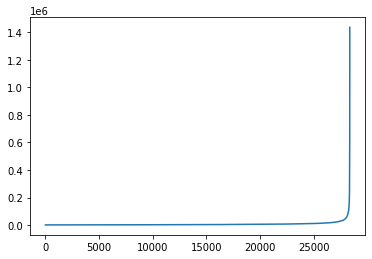

In [ ]:
plt.plot(var[:-2])
plt.show()

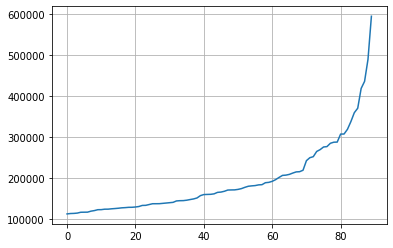

In [ ]:
plt.plot(var[-100:-10])
plt.grid()
plt.show()

 Here as we can see after average_monthly_balance_prevQ > 150000 there exists some outliers

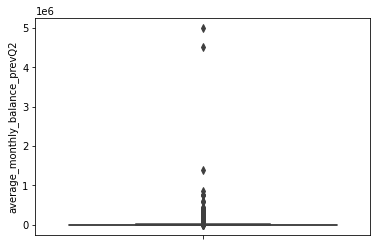

In [ ]:
#Univariate analysis: average_monthly_balance_prevQ2
sns.boxplot(y="average_monthly_balance_prevQ2", data =df)
plt.show()

In [ ]:
df['average_monthly_balance_prevQ2'].min()

-16506.1

In [ ]:
#calculating average_monthly_balance_prevQ2 values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["average_monthly_balance_prevQ2"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -16506.1
10 percentile value is 1039.33
20 percentile value is 1601.62
30 percentile value is 2086.5
40 percentile value is 2678.74
50 percentile value is 3359.65
60 percentile value is 4257.0
70 percentile value is 5573.93
80 percentile value is 7809.08
90 percentile value is 12785.72
100 percentile value is  5010170.1


In [ ]:
#calculating average_monthly_balance_prevQ2 values at each percntile 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
for i in np.arange(0.0, 1.1, 0.1):
    var =df["average_monthly_balance_prevQ2"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(round(0+i,1) ,var[int(len(var)*(float(0+i)/100))]))
#print("10 percentile value is ",var[-1])

0.0 percentile value is -16506.1
0.1 percentile value is 0.49
0.2 percentile value is 9.05
0.3 percentile value is 25.49
0.4 percentile value is 37.49
0.5 percentile value is 54.33
0.6 percentile value is 72.93
0.7 percentile value is 83.39
0.8 percentile value is 94.95
0.9 percentile value is 108.05
1.0 percentile value is 120.96


In [ ]:
#calculating average_monthly_balance_prevQ2 values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["average_monthly_balance_prevQ2"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 59397.49
99.1 percentile value is 63199.48
99.2 percentile value is 67587.85
99.3 percentile value is 73685.13
99.4 percentile value is 81582.98
99.5 percentile value is 92577.45
99.6 percentile value is 102673.83
99.7 percentile value is 120861.61
99.8 percentile value is 151956.11
99.9 percentile value is 239088.71
100 percentile value is  5010170.1


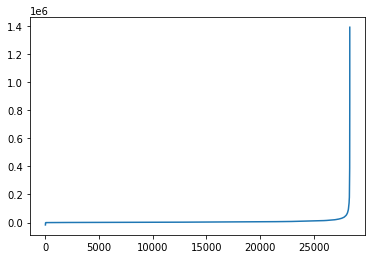

In [ ]:
plt.plot(var[:-2])
plt.show()

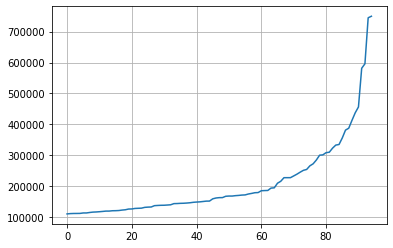

In [ ]:
plt.plot(var[-100:-5])
plt.grid()
plt.show()

 Here as we can see after average_monthly_balance_prevQ2 > 150000 there exists some outliers

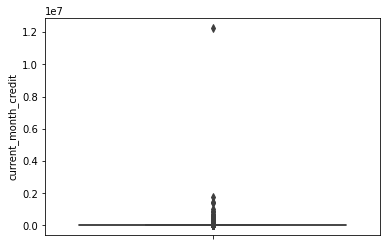

In [ ]:
#Univariate analysis: current_month_credit
sns.boxplot(y="current_month_credit", data =df)
plt.show()

In [ ]:
df['current_month_credit'].min()

0.01

In [ ]:
#calculating current_month_credit values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["current_month_credit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.13
20 percentile value is 0.26
30 percentile value is 0.39
40 percentile value is 0.5
50 percentile value is 0.61
60 percentile value is 39.67
70 percentile value is 395.56
80 percentile value is 1186.06
90 percentile value is 4065.7
100 percentile value is  12269845.39


In [ ]:
#calculating current_month_credit values at each percntile 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
for i in np.arange(0.0, 1.1, 0.1):
    var =df["current_month_credit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(round(0+i,1) ,var[int(len(var)*(float(0+i)/100))]))
#print("10 percentile value is ",var[-1])

0.0 percentile value is 0.01
0.1 percentile value is 0.01
0.2 percentile value is 0.01
0.3 percentile value is 0.01
0.4 percentile value is 0.01
0.5 percentile value is 0.01
0.6 percentile value is 0.01
0.7 percentile value is 0.01
0.8 percentile value is 0.01
0.9 percentile value is 0.01
1.0 percentile value is 0.01


In [ ]:
#calculating current_month_credit values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["current_month_credit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 50244.77
99.1 percentile value is 54192.88
99.2 percentile value is 60071.49
99.3 percentile value is 71428.91
99.4 percentile value is 78324.01
99.5 percentile value is 87143.36
99.6 percentile value is 107143.07
99.7 percentile value is 140081.17
99.8 percentile value is 187007.88
99.9 percentile value is 283196.17
100 percentile value is  12269845.39


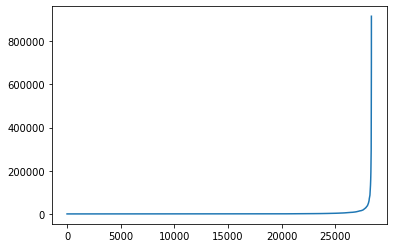

In [ ]:
plt.plot(var[:-5])
plt.show()

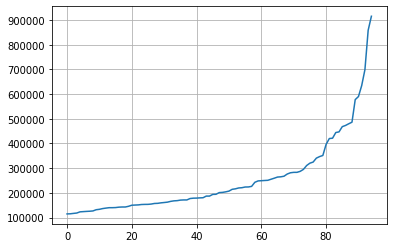

In [ ]:
plt.plot(var[-100:-5])
plt.grid()
plt.show()

 Here as we can see after current_month_credit > 150000 there exists some outliers

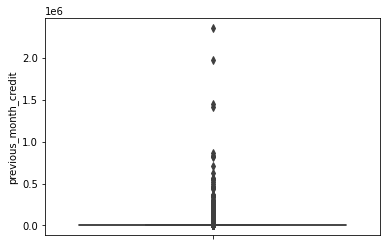

In [ ]:
#Univariate analysis: previous_month_credit
sns.boxplot(y="previous_month_credit", data =df)
plt.show()

In [ ]:
df['previous_month_credit'].min()

0.01

In [ ]:
#calculating previous_month_credit values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["previous_month_credit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.13
20 percentile value is 0.26
30 percentile value is 0.39
40 percentile value is 0.51
50 percentile value is 0.63
60 percentile value is 68.04
70 percentile value is 470.0
80 percentile value is 1371.97
90 percentile value is 4386.07
100 percentile value is  2361808.29


In [ ]:
#calculating previous_month_credit values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["previous_month_credit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 52151.5
99.1 percentile value is 58129.16
99.2 percentile value is 66116.07
99.3 percentile value is 71429.19
99.4 percentile value is 80222.04
99.5 percentile value is 93105.56
99.6 percentile value is 113270.62
99.7 percentile value is 143980.87
99.8 percentile value is 209285.92
99.9 percentile value is 289271.49
100 percentile value is  2361808.29


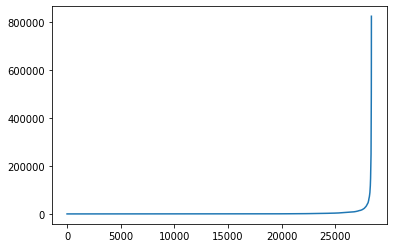

In [ ]:
plt.plot(var[:-5])
plt.show()

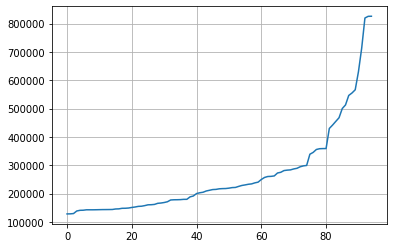

In [ ]:
plt.plot(var[-100:-5])
plt.grid()
plt.show()

 Here as we can see after previous_month_credit > 150000 there exists some outliers

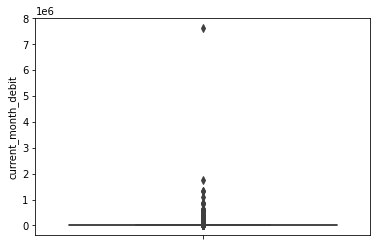

In [ ]:
#Univariate analysis: current_month_debit
sns.boxplot(y="current_month_debit", data =df)
plt.show()

In [ ]:
df['current_month_debit'].min()

0.01

In [ ]:
#calculating current_month_debit values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["current_month_debit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.16
20 percentile value is 0.33
30 percentile value is 0.49
40 percentile value is 0.66
50 percentile value is 91.95
60 percentile value is 357.3
70 percentile value is 857.31
80 percentile value is 1927.18
90 percentile value is 5500.6
100 percentile value is  7637857.36


In [ ]:
#calculating current_month_debit values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["current_month_debit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 51428.66
99.1 percentile value is 55714.61
99.2 percentile value is 60714.39
99.3 percentile value is 70000.63
99.4 percentile value is 76446.65
99.5 percentile value is 90000.36
99.6 percentile value is 107252.64
99.7 percentile value is 140714.86
99.8 percentile value is 181429.09
99.9 percentile value is 286970.04
100 percentile value is  7637857.36


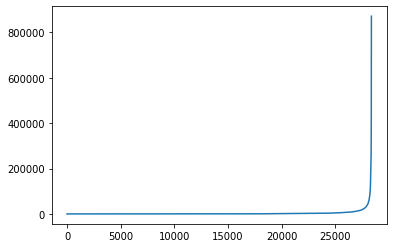

In [ ]:
plt.plot(var[:-5])
plt.show()

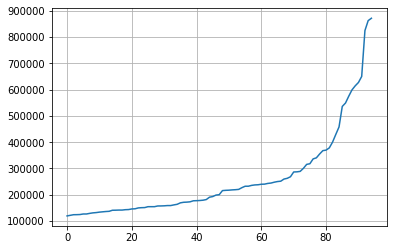

In [ ]:
plt.plot(var[-100:-5])
plt.grid()
plt.show()

 Here as we can see after current_month_debit > 150000 there exists some outliers

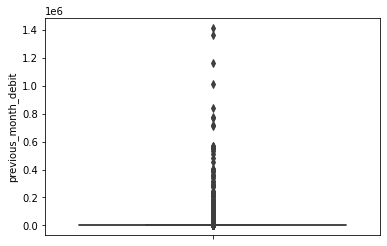

In [ ]:
#Univariate analysis: previous_month_debit
sns.boxplot(y="previous_month_debit", data =df)
plt.show()

In [ ]:
df['previous_month_debit'].min()

0.01

In [ ]:
#calculating previous_month_debit values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["previous_month_debit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.17
20 percentile value is 0.33
30 percentile value is 0.5
40 percentile value is 0.66
50 percentile value is 109.97
60 percentile value is 357.44
70 percentile value is 857.73
80 percentile value is 2000.67
90 percentile value is 5634.06
100 percentile value is  1414168.06


In [ ]:
#calculating previous_month_debit values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["previous_month_debit"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 48369.58
99.1 percentile value is 52143.27
99.2 percentile value is 57773.47
99.3 percentile value is 63980.77
99.4 percentile value is 72471.74
99.5 percentile value is 82857.3
99.6 percentile value is 98955.19
99.7 percentile value is 120399.39
99.8 percentile value is 162357.29
99.9 percentile value is 307897.6
100 percentile value is  1414168.06


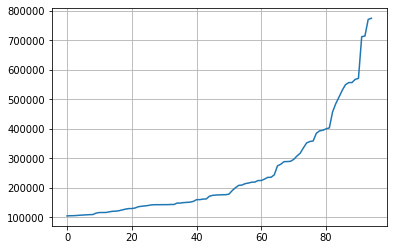

In [ ]:
plt.plot(var[-100:-5])
plt.grid()
plt.show()

 Here as we can see after previous_month_debit > 150000 there exists some outliers

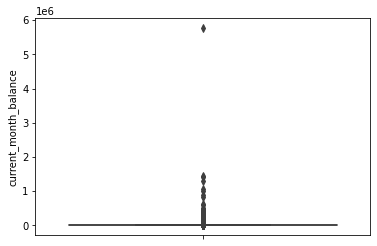

In [ ]:
#Univariate analysis: current_month_balance
sns.boxplot(y="current_month_balance", data =df)
plt.show()

In [ ]:
df['current_month_balance'].min()

-3374.18

In [ ]:
#calculating current_month_balance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["current_month_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -3374.18
10 percentile value is 1406.21
20 percentile value is 1785.31
30 percentile value is 2236.17
40 percentile value is 2797.51
50 percentile value is 3448.01
60 percentile value is 4378.2
70 percentile value is 5749.22
80 percentile value is 7945.22
90 percentile value is 13155.73
100 percentile value is  5778184.77


In [ ]:
#calculating current_month_balance values at each percntile 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
for i in np.arange(0.0, 1.1, 0.1):
    var =df["current_month_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(round(0+i,1) ,var[int(len(var)*(float(0+i)/100))]))
#print("10 percentile value is ",var[-1])

0.0 percentile value is -3374.18
0.1 percentile value is 9.44
0.2 percentile value is 23.75
0.3 percentile value is 57.04
0.4 percentile value is 79.42
0.5 percentile value is 95.14
0.6 percentile value is 115.24
0.7 percentile value is 141.52
0.8 percentile value is 164.04
0.9 percentile value is 192.27
1.0 percentile value is 207.27


In [ ]:
#calculating current_month_balance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["current_month_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 64128.1
99.1 percentile value is 68209.33
99.2 percentile value is 72654.2
99.3 percentile value is 81418.92
99.4 percentile value is 88124.32
99.5 percentile value is 96952.77
99.6 percentile value is 109904.48
99.7 percentile value is 131732.17
99.8 percentile value is 162884.02
99.9 percentile value is 278286.96
100 percentile value is  5778184.77


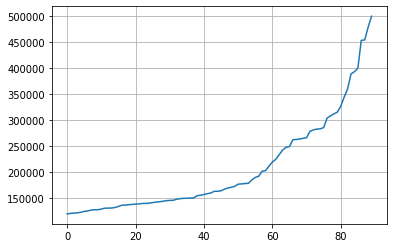

In [ ]:
plt.plot(var[-100:-10])
plt.grid()
plt.show()

 Here as we can see after current_month_balance > 150000 and current_month_balance < 0 there exists some outliers

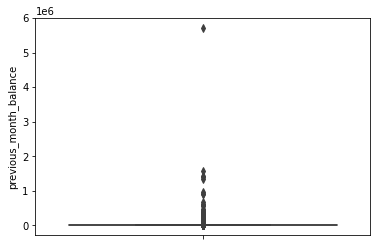

In [ ]:
#Univariate analysis: previous_month_balance
sns.boxplot(y="previous_month_balance", data =df)
plt.show()

In [ ]:
df['previous_month_balance'].min()

-5171.92

In [ ]:
#calculating previous_month_balance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =df["previous_month_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -5171.92
10 percentile value is 1506.79
20 percentile value is 1863.48
30 percentile value is 2294.81
40 percentile value is 2836.15
50 percentile value is 3465.24
60 percentile value is 4374.5
70 percentile value is 5728.28
80 percentile value is 7961.83
90 percentile value is 13132.61
100 percentile value is  5720144.5


In [ ]:
#calculating previous_month_balance values at each percntile 0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
for i in np.arange(0.0, 1.1, 0.1):
    var =df["previous_month_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(round(0+i,1) ,var[int(len(var)*(float(0+i)/100))]))
#print("10 percentile value is ",var[-1])

0.0 percentile value is -5171.92
0.1 percentile value is 13.99
0.2 percentile value is 47.63
0.3 percentile value is 87.03
0.4 percentile value is 115.09
0.5 percentile value is 148.44
0.6 percentile value is 181.26
0.7 percentile value is 211.17
0.8 percentile value is 253.92
0.9 percentile value is 287.55
1.0 percentile value is 318.52


In [ ]:
#calculating previous_month_balance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =df["previous_month_balance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 62923.26
99.1 percentile value is 66196.64
99.2 percentile value is 70058.99
99.3 percentile value is 77706.1
99.4 percentile value is 86217.46
99.5 percentile value is 93063.63
99.6 percentile value is 107973.24
99.7 percentile value is 132387.87
99.8 percentile value is 165185.15
99.9 percentile value is 283820.69
100 percentile value is  5720144.5


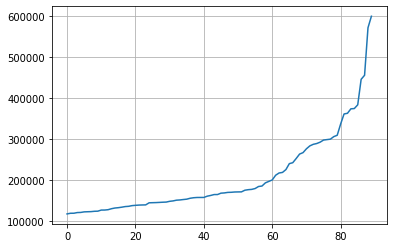

In [ ]:
plt.plot(var[-100:-10])
plt.grid()
plt.show()

 Here as we can see after previous_month_balance > 150000 and previous_month_balance < 0 there exists some outliers

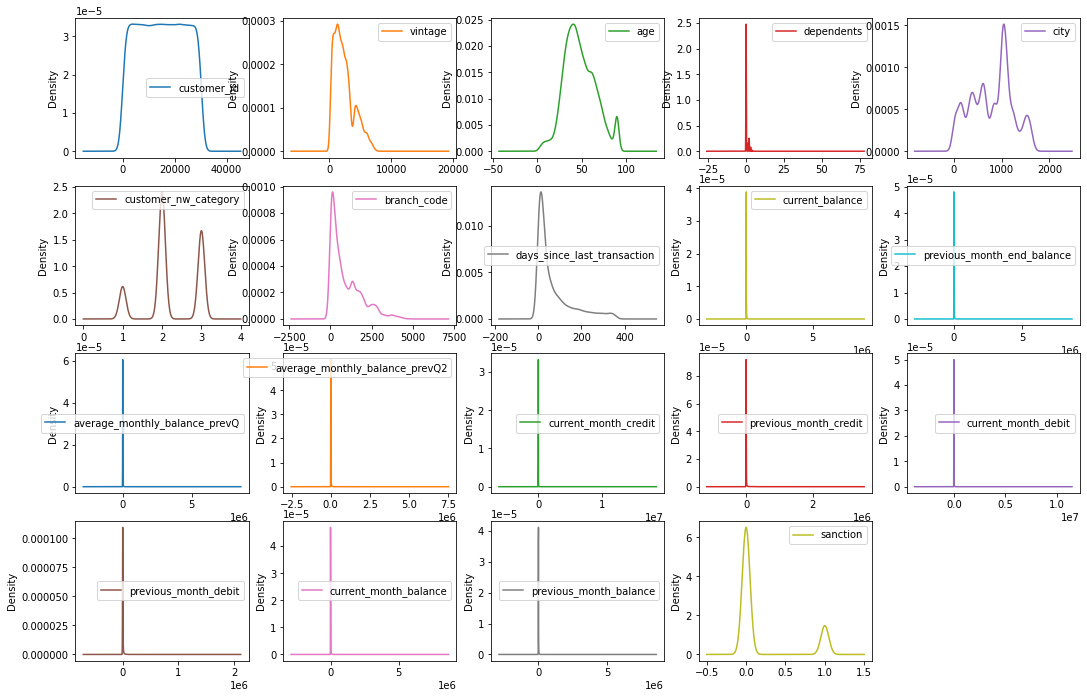

In [ ]:
# Probability distribution

df.plot(kind="density", layout=(6,5), 
             subplots=True,sharex=False, sharey=False, figsize=(18,18))
plt.show()

## 3. Missing Values
Before we go on to build the model, we must look for missing values within the dataset as treating the missing values  is a necessary step before we fit a model on the dataset.

In [ ]:
pd.isnull(df).sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
sanction                             0
dtype: int64

In [ ]:
# impute all missing values by missing_value_treatment function

def missing_value_treatment(data):

    # impute missing value by mode of gender
    data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

    # impute missing value by median of dependents
    data['dependents'] = data['dependents'].fillna(data['dependents'].median())

    # impute missing value by mode of occupation
    data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])

    # impute missing value by median of city
    data['city'] = data['city'].fillna(data['city'].median())

    # impute missing value by median of days_since_last_transaction
    data['days_since_last_transaction'] = data['days_since_last_transaction'].fillna(data['days_since_last_transaction'].median())

    return data

In [ ]:
data_without_missingvalue=missing_value_treatment(df)

print(data_without_missingvalue['gender'].isnull().sum())
print(data_without_missingvalue['dependents'].isnull().sum())
print(data_without_missingvalue['occupation'].isnull().sum())
print(data_without_missingvalue['city'].isnull().sum())
print(data_without_missingvalue['days_since_last_transaction'].isnull().sum())

0
0
0
0
0


In [ ]:
# changing datatypes as meainingful way

data_without_missingvalue = data_without_missingvalue.astype({'dependents': 'object', 'city': 'object', 'branch_code': 'object', 'customer_nw_category': 'object'
                , 'days_since_last_transaction': 'object', 'vintage': 'object'})

In [ ]:
data_without_missingvalue.dtypes

customer_id                         int64
vintage                            object
age                                 int64
gender                             object
dependents                         object
occupation                         object
city                               object
customer_nw_category               object
branch_code                        object
days_since_last_transaction        object
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
sanction                            int64
dtype: object

## 4. Outlier treatment

In [ ]:
#removing all outliers based on our univariate analysis above

def outlier_treatment(new_frame):

    a = new_frame.shape[0]
    print ("Number of records = ",a)
    temp_frame = new_frame[((new_frame.dependents >= 0.0) & (new_frame.dependents <= 4.0))]
    b = temp_frame.shape[0]
    print ("Number of outliers from dependents analysis:",(a-b))

    
    temp_frame = new_frame[(new_frame.vintage > 0) & (new_frame.vintage <= 7500)]
    c = temp_frame.shape[0]
    print ("Number of outliers from vintage analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.current_balance > 0) & (new_frame.current_balance < 200000)]
    d = temp_frame.shape[0]
    print ("Number of outliers from current_balance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.previous_month_end_balance > 0) & (new_frame.previous_month_end_balance < 150000)]
    e = temp_frame.shape[0]
    print ("Number of outliers from previous_month_end_balance analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.average_monthly_balance_prevQ > 0) & (new_frame.average_monthly_balance_prevQ < 150000)]
    f = temp_frame.shape[0]
    print ("Number of outliers from average_monthly_balance_prevQ analysis:",(a-f))

    temp_frame = new_frame[(new_frame.average_monthly_balance_prevQ2 > 0) & (new_frame.average_monthly_balance_prevQ2 < 150000)]
    g = temp_frame.shape[0]
    print ("Number of outliers from average_monthly_balance_prevQ2 analysis:",(a-g))

    temp_frame = new_frame[(new_frame.current_month_credit > 0) & (new_frame.current_month_credit < 150000)]
    h = temp_frame.shape[0]
    print ("Number of outliers from current_month_credit analysis:",(a-h))

    temp_frame = new_frame[(new_frame.previous_month_credit > 0) & (new_frame.previous_month_credit < 150000)]
    i = temp_frame.shape[0]
    print ("Number of outliers from previous_month_credit analysis:",(a-i))

    temp_frame = new_frame[(new_frame.current_month_debit > 0) & (new_frame.current_month_debit < 150000)]
    j = temp_frame.shape[0]
    print ("Number of outliers from current_month_debit analysis:",(a-j))

    temp_frame = new_frame[(new_frame.previous_month_debit > 0) & (new_frame.previous_month_debit < 150000)]
    k = temp_frame.shape[0]
    print ("Number of outliers from previous_month_debit analysis:",(a-k))

    temp_frame = new_frame[(new_frame.current_month_balance > 0) & (new_frame.current_month_balance < 150000)]
    l = temp_frame.shape[0]
    print ("Number of outliers from current_month_balance analysis:",(a-l))

    temp_frame = new_frame[(new_frame.previous_month_balance > 0) & (new_frame.previous_month_balance < 150000)]
    m = temp_frame.shape[0]
    print ("Number of outliers from previous_month_balance analysis:",(a-m))

    
    new_frame = new_frame[((new_frame.dependents >= 0.0) & (new_frame.dependents <= 4.0))]
    new_frame = new_frame[(new_frame.vintage > 0) & (new_frame.vintage <= 7500)]
    new_frame = new_frame[(new_frame.current_balance > 0) & (new_frame.current_balance < 200000)]
    new_frame = new_frame[(new_frame.previous_month_end_balance > 0) & (new_frame.previous_month_end_balance < 150000)]
    new_frame = new_frame[(new_frame.average_monthly_balance_prevQ > 0) & (new_frame.average_monthly_balance_prevQ < 150000)]
    new_frame = new_frame[(new_frame.average_monthly_balance_prevQ2 > 0) & (new_frame.average_monthly_balance_prevQ2 < 150000)]
    new_frame = new_frame[(new_frame.current_month_credit > 0) & (new_frame.current_month_credit < 150000)]
    new_frame = new_frame[(new_frame.previous_month_credit > 0) & (new_frame.previous_month_credit < 150000)]
    new_frame = new_frame[(new_frame.current_month_debit > 0) & (new_frame.current_month_debit < 150000)]
    new_frame = new_frame[(new_frame.previous_month_debit > 0) & (new_frame.previous_month_debit < 150000)]
    new_frame = new_frame[(new_frame.current_month_balance > 0) & (new_frame.current_month_balance < 150000)]
    new_frame = new_frame[(new_frame.previous_month_balance > 0) & (new_frame.previous_month_balance < 150000)]

    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("---")
    return new_frame

In [ ]:
print ("Removing outliers")
print ("----")
frame_with_outliers_removed = outlier_treatment(data_without_missingvalue)
print("fraction of data points that remain after removing outliers", float(len(frame_with_outliers_removed))/len(df))

Removing outliers
----
Number of records =  28382
Number of outliers from dependents analysis: 59
Number of outliers from vintage analysis: 16
Number of outliers from current_balance analysis: 63
Number of outliers from previous_month_end_balance analysis: 85
Number of outliers from average_monthly_balance_prevQ analysis: 62
Number of outliers from average_monthly_balance_prevQ2 analysis: 81
Number of outliers from current_month_credit analysis: 80
Number of outliers from previous_month_credit analysis: 80
Number of outliers from current_month_debit analysis: 77
Number of outliers from previous_month_debit analysis: 64
Number of outliers from current_month_balance analysis: 72
Number of outliers from previous_month_balance analysis: 72
Total outliers removed 372
---
fraction of data points that remain after removing outliers 0.9868931012613629


## 5. Splitting data into Train and cross validation(or test): Stratified Sampling

In [ ]:
y = frame_with_outliers_removed['sanction'].values
X = frame_with_outliers_removed.drop(['sanction'], axis=1)
X.head(2)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71
1,2,310,35,Male,0.0,self_employed,834.0,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [ ]:
print("Train data ",X_train.shape, y_train.shape)
print("CV data    ",X_cv.shape, y_cv.shape)
print("Test data  ",X_test.shape, y_test.shape)

Train data  (12573, 20) (12573,)
CV data     (6193, 20) (6193,)
Test data   (9244, 20) (9244,)


## 6. Make Data Model Ready: encoding numerical, categorical features

### 6.1 encoding categorical features: Occupation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X_cv['occupation'].value_counts()

self_employed    3812
salaried         1482
student           444
retired           443
company            12
Name: occupation, dtype: int64

In [ ]:
vectorizer = CountVectorizer()
v = vectorizer.fit(X_train['occupation'].values) # fit has to happen only on train data
print(type(v))


# we use the fitted CountVectorizer to convert the text to vector
X_train_occupation_ohe = vectorizer.transform(X_train['occupation'].values)
X_cv_occupation_ohe = vectorizer.transform(X_cv['occupation'].values)
X_test_occupation_ohe = vectorizer.transform(X_test['occupation'].values)

print("After vectorizations")
print(X_train_occupation_ohe.shape, y_train.shape)
print(X_cv_occupation_ohe.shape, y_cv.shape)
print(X_test_occupation_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

<class 'sklearn.feature_extraction.text.CountVectorizer'>
After vectorizations
(12573, 5) (12573,)
(6193, 5) (6193,)
(9244, 5) (9244,)
['company', 'retired', 'salaried', 'self_employed', 'student']


### 6.2 encoding categorical features: Gender

In [ ]:
vectorizer = CountVectorizer()
v = vectorizer.fit(X_train['gender'].values) # fit has to happen only on train data
print(type(v))


# we use the fitted CountVectorizer to convert the text to vector
X_train_gender_ohe = vectorizer.transform(X_train['gender'].values)
X_cv_gender_ohe = vectorizer.transform(X_cv['gender'].values)
X_test_gender_ohe = vectorizer.transform(X_test['gender'].values)

print("After vectorizations")
print(X_train_gender_ohe.shape, y_train.shape)
print(X_cv_gender_ohe.shape, y_cv.shape)
print(X_test_gender_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

<class 'sklearn.feature_extraction.text.CountVectorizer'>
After vectorizations
(12573, 2) (12573,)
(6193, 2) (6193,)
(9244, 2) (9244,)
['female', 'male']


### 6.3 encoding categorical features: customer_nw_category

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

In [ ]:
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

In [ ]:
# https://stackoverflow.com/questions/66122577/response-coding-for-categorical-data
from prettytable import PrettyTable
from tqdm import tqdm

def response_coding(xtrain, ytrain, feature):
    
    dictionary = dict()
    x = PrettyTable()
    x = PrettyTable([feature, 'class 1', 'class 0'])

    unique_cat_labels = np.unique(xtrain[feature])

    for i in tqdm(range(len(unique_cat_labels))):
        total_count = xtrain.loc[:,feature][(xtrain[feature] == unique_cat_labels[i])].count()
        p_0 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==0))].count()
        p_1 = xtrain.loc[:, feature][((xtrain[feature] == unique_cat_labels[i]) & (ytrain==1))].count()

        dictionary[unique_cat_labels[i]] = [p_1/total_count, p_0/total_count]

        row = []
        row.append(unique_cat_labels[i])
        row.append(p_1/total_count)
        row.append(p_0/total_count)
        x.add_row(row)
    print(x)
    #print(x)[![enter image description here][1]][1]
    return dictionary

In [ ]:
customer_nw_category_response=response_coding(X_train, y_train, 'customer_nw_category')

100%|██████████| 3/3 [00:00<00:00, 53.39it/s]

+----------------------+---------------------+--------------------+
| customer_nw_category |       class 1       |      class 0       |
+----------------------+---------------------+--------------------+
|          1           | 0.17865853658536585 | 0.8213414634146341 |
|          2           | 0.17923497267759564 | 0.8207650273224044 |
|          3           |  0.1894876325088339 | 0.8105123674911661 |
+----------------------+---------------------+--------------------+


In [ ]:
# response coding on X_train

customer_nw_category_tr_class1 = []
customer_nw_category_tr_class0 = []
for row_X_train in X_train['customer_nw_category']:
    for row_dict in customer_nw_category_response:
        if row_X_train == row_dict:
            customer_nw_category_tr_class1.append(customer_nw_category_response[row_dict][0])
            customer_nw_category_tr_class0.append(customer_nw_category_response[row_dict][1])
            
print(len(customer_nw_category_tr_class1))
print(len(customer_nw_category_tr_class0))
print(len(X_train))


# response coding on X_cv

customer_nw_category_cv_class1 = []
customer_nw_category_cv_class0 = []
for row_X_cv in X_cv['customer_nw_category']:
    s=0
    for row_dict in customer_nw_category_response:
        if row_X_cv == row_dict:
            customer_nw_category_cv_class1.append(customer_nw_category_response[row_dict][0])
            customer_nw_category_cv_class0.append(customer_nw_category_response[row_dict][1])
            s=1
            
    if s!=1:
        customer_nw_category_cv_class1.append(0.5)
        customer_nw_category_cv_class0.append(0.5)
            
print(len(customer_nw_category_cv_class1))
print(len(customer_nw_category_cv_class0))
print(len(X_cv))



# response coding on X_test

customer_nw_category_te_class1 = []
customer_nw_category_te_class0 = []
for row_X_test in X_test['customer_nw_category']:
    s=0
    for row_dict in customer_nw_category_response:
        if row_X_test == row_dict:
            customer_nw_category_te_class1.append(customer_nw_category_response[row_dict][0])
            customer_nw_category_te_class0.append(customer_nw_category_response[row_dict][1])
            s=1
            
    if s!=1:
        customer_nw_category_te_class1.append(0.5)
        customer_nw_category_te_class0.append(0.5)
            
print(len(customer_nw_category_te_class1))
print(len(customer_nw_category_te_class0))
print(len(X_test))

12573
12573
12573
6193
6193
6193
9244
9244
9244


### 6.4 encoding categorical features: dependents

In [ ]:
dependents_response=response_coding(X_train, y_train, 'dependents')

100%|██████████| 5/5 [00:00<00:00, 130.30it/s]

+------------+---------------------+--------------------+
| dependents |       class 1       |      class 0       |
+------------+---------------------+--------------------+
|    0.0     | 0.17601437624136954 | 0.8239856237586305 |
|    1.0     | 0.21634615384615385 | 0.7836538461538461 |
|    2.0     | 0.21602434077079108 | 0.783975659229209  |
|    3.0     | 0.23397435897435898 | 0.7660256410256411 |
|    4.0     | 0.21794871794871795 | 0.782051282051282  |
+------------+---------------------+--------------------+


In [ ]:
# response coding on X_train

dependents_tr_class1 = []
dependents_tr_class0 = []
for row_X_train in X_train['dependents']:
    for row_dict in dependents_response:
        if row_X_train == row_dict:
            dependents_tr_class1.append(dependents_response[row_dict][0])
            dependents_tr_class0.append(dependents_response[row_dict][1])
            
print(len(dependents_tr_class1))
print(len(dependents_tr_class0))
print(len(X_train))


# response coding on X_cv

dependents_cv_class1 = []
dependents_cv_class0 = []
for row_X_cv in X_cv['dependents']:
    s=0
    for row_dict in dependents_response:
        if row_X_cv == row_dict:
            dependents_cv_class1.append(dependents_response[row_dict][0])
            dependents_cv_class0.append(dependents_response[row_dict][1])
            s=1
            
    if s!=1:
        dependents_cv_class1.append(0.5)
        dependents_cv_class0.append(0.5)
            
print(len(dependents_cv_class1))
print(len(dependents_cv_class0))
print(len(X_cv))



# response coding on X_test

dependents_te_class1 = []
dependents_te_class0 = []
for row_X_test in X_test['dependents']:
    s=0
    for row_dict in dependents_response:
        if row_X_test == row_dict:
            dependents_te_class1.append(dependents_response[row_dict][0])
            dependents_te_class0.append(dependents_response[row_dict][1])
            s=1
            
    if s!=1:
        dependents_te_class1.append(0.5)
        dependents_te_class0.append(0.5)
            
print(len(dependents_te_class1))
print(len(dependents_te_class0))
print(len(X_test))

12573
12573
12573
6193
6193
6193
9244
9244
9244


### 6.5 encoding categorical features: city

In [ ]:
city_response=response_coding(X_train, y_train, 'city')

100%|██████████| 1126/1126 [00:09<00:00, 117.66it/s]


+--------+----------------------+---------------------+
|  city  |       class 1        |       class 0       |
+--------+----------------------+---------------------+
|  0.0   | 0.18181818181818182  |  0.8181818181818182 |
|  2.0   |         0.5          |         0.5         |
|  3.0   |         0.0          |         1.0         |
|  6.0   |         0.0          |         1.0         |
|  7.0   |         0.0          |         1.0         |
|  8.0   |         0.0          |         1.0         |
|  9.0   |         0.2          |         0.8         |
|  11.0  | 0.17857142857142858  |  0.8214285714285714 |
|  14.0  |         0.0          |         1.0         |
|  15.0  | 0.17770034843205576  |  0.8222996515679443 |
|  17.0  |        0.375         |        0.625        |
|  18.0  |         0.0          |         1.0         |
|  19.0  |         0.2          |         0.8         |
|  20.0  |         0.0          |         1.0         |
|  21.0  | 0.14285714285714285  |  0.85714285714

In [ ]:
# response coding on X_train

city_tr_class1 = []
city_tr_class0 = []
for row_X_train in X_train['city']:
    for row_dict in city_response:
        if row_X_train == row_dict:
            city_tr_class1.append(city_response[row_dict][0])
            city_tr_class0.append(city_response[row_dict][1])
            
print(len(city_tr_class1))
print(len(city_tr_class0))
print(len(X_train))


# response coding on X_cv

city_cv_class1 = []
city_cv_class0 = []
for row_X_cv in X_cv['city']:
    s=0
    for row_dict in city_response:
        if row_X_cv == row_dict:
            city_cv_class1.append(city_response[row_dict][0])
            city_cv_class0.append(city_response[row_dict][1])
            s=1
            
    if s!=1:
        city_cv_class1.append(0.5)
        city_cv_class0.append(0.5)
            
print(len(city_cv_class1))
print(len(city_cv_class0))
print(len(X_cv))



# response coding on X_test

city_te_class1 = []
city_te_class0 = []
for row_X_test in X_test['city']:
    s=0
    for row_dict in city_response:
        if row_X_test == row_dict:
            city_te_class1.append(city_response[row_dict][0])
            city_te_class0.append(city_response[row_dict][1])
            s=1
            
    if s!=1:
        city_te_class1.append(0.5)
        city_te_class0.append(0.5)
            
print(len(city_te_class1))
print(len(city_te_class0))
print(len(X_test))

12573
12573
12573
6193
6193
6193
9244
9244
9244


### 6.6 encoding categorical features: branch_code

In [ ]:
branch_code_response=response_coding(X_train, y_train, 'branch_code')

100%|██████████| 2593/2593 [00:10<00:00, 248.81it/s]


+-------------+----------------------+---------------------+
| branch_code |       class 1        |       class 0       |
+-------------+----------------------+---------------------+
|      1      |  0.0975609756097561  |  0.9024390243902439 |
|      2      | 0.05405405405405406  |  0.9459459459459459 |
|      3      | 0.19444444444444445  |  0.8055555555555556 |
|      4      | 0.14285714285714285  |  0.8571428571428571 |
|      5      | 0.16216216216216217  |  0.8378378378378378 |
|      6      | 0.22807017543859648  |  0.7719298245614035 |
|      7      | 0.28205128205128205  |  0.717948717948718  |
|      8      | 0.08695652173913043  |  0.9130434782608695 |
|      9      | 0.17391304347826086  |  0.8260869565217391 |
|      10     | 0.23076923076923078  |  0.7692307692307693 |
|      11     |       0.21875        |       0.78125       |
|      12     | 0.15789473684210525  |  0.8421052631578947 |
|      13     |  0.3055555555555556  |  0.6944444444444444 |
|      14     |  0.26923

In [ ]:
# response coding on X_train

branch_code_tr_class1 = []
branch_code_tr_class0 = []
for row_X_train in X_train['branch_code']:
    for row_dict in branch_code_response:
        if row_X_train == row_dict:
            branch_code_tr_class1.append(branch_code_response[row_dict][0])
            branch_code_tr_class0.append(branch_code_response[row_dict][1])
            
print(len(branch_code_tr_class1))
print(len(branch_code_tr_class0))
print(len(X_train))


# response coding on X_cv

branch_code_cv_class1 = []
branch_code_cv_class0 = []
for row_X_cv in X_cv['branch_code']:
    s=0
    for row_dict in branch_code_response:
        if row_X_cv == row_dict:
            branch_code_cv_class1.append(branch_code_response[row_dict][0])
            branch_code_cv_class0.append(branch_code_response[row_dict][1])
            s=1
            
    if s!=1:
        branch_code_cv_class1.append(0.5)
        branch_code_cv_class0.append(0.5)
            
print(len(branch_code_cv_class1))
print(len(branch_code_cv_class0))
print(len(X_cv))



# response coding on X_test

branch_code_te_class1 = []
branch_code_te_class0 = []
for row_X_test in X_test['branch_code']:
    s=0
    for row_dict in branch_code_response:
        if row_X_test == row_dict:
            branch_code_te_class1.append(branch_code_response[row_dict][0])
            branch_code_te_class0.append(branch_code_response[row_dict][1])
            s=1
            
    if s!=1:
        branch_code_te_class1.append(0.5)
        branch_code_te_class0.append(0.5)
            
print(len(branch_code_te_class1))
print(len(branch_code_te_class0))
print(len(X_test))

12573
12573
12573
6193
6193
6193
9244
9244
9244


### 6.7 encoding categorical features: vintage

In [ ]:
vintage_response=response_coding(X_train, y_train, 'vintage')

100%|██████████| 4528/4528 [00:18<00:00, 242.35it/s]


+---------+---------------------+---------------------+
| vintage |       class 1       |       class 0       |
+---------+---------------------+---------------------+
|   180   |         1.0         |         0.0         |
|   181   |         0.5         |         0.5         |
|   182   |         0.0         |         1.0         |
|   183   |         0.0         |         1.0         |
|   184   |         0.25        |         0.75        |
|   185   | 0.16666666666666666 |  0.8333333333333334 |
|   186   |         0.0         |         1.0         |
|   187   |         0.0         |         1.0         |
|   188   |         0.4         |         0.6         |
|   189   |         0.0         |         1.0         |
|   190   |  0.6666666666666666 |  0.3333333333333333 |
|   191   |         0.5         |         0.5         |
|   192   |         1.0         |         0.0         |
|   193   |         0.5         |         0.5         |
|   194   |         0.0         |         1.0   

In [ ]:
# response coding on X_train

vintage_tr_class1 = []
vintage_tr_class0 = []
for row_X_train in X_train['vintage']:
    for row_dict in vintage_response:
        if row_X_train == row_dict:
            vintage_tr_class1.append(vintage_response[row_dict][0])
            vintage_tr_class0.append(vintage_response[row_dict][1])
            
print(len(vintage_tr_class1))
print(len(vintage_tr_class0))
print(len(X_train))


# response coding on X_cv

vintage_cv_class1 = []
vintage_cv_class0 = []
for row_X_cv in X_cv['vintage']:
    s=0
    for row_dict in vintage_response:
        if row_X_cv == row_dict:
            vintage_cv_class1.append(vintage_response[row_dict][0])
            vintage_cv_class0.append(vintage_response[row_dict][1])
            s=1
            
    if s!=1:
        vintage_cv_class1.append(0.5)
        vintage_cv_class0.append(0.5)
            
print(len(vintage_cv_class1))
print(len(vintage_cv_class0))
print(len(X_cv))



# response coding on X_test

vintage_te_class1 = []
vintage_te_class0 = []
for row_X_test in X_test['vintage']:
    s=0
    for row_dict in vintage_response:
        if row_X_test == row_dict:
            vintage_te_class1.append(vintage_response[row_dict][0])
            vintage_te_class0.append(vintage_response[row_dict][1])
            s=1
            
    if s!=1:
        vintage_te_class1.append(0.5)
        vintage_te_class0.append(0.5)
            
print(len(vintage_te_class1))
print(len(vintage_te_class0))
print(len(X_test))

12573
12573
12573
6193
6193
6193
9244
9244
9244


### 6.8 encoding categorical features: days_since_last_transaction

In [ ]:
days_since_last_transaction_response=response_coding(X_train, y_train, 'days_since_last_transaction')

100%|██████████| 345/345 [00:01<00:00, 280.09it/s]


+-----------------------------+----------------------+--------------------+
| days_since_last_transaction |       class 1        |      class 0       |
+-----------------------------+----------------------+--------------------+
|             0.0             | 0.17342657342657342  | 0.8265734265734266 |
|             1.0             |  0.2222222222222222  | 0.7777777777777778 |
|             2.0             | 0.14705882352941177  | 0.8529411764705882 |
|             3.0             | 0.20580474934036938  | 0.7941952506596306 |
|             4.0             | 0.23076923076923078  | 0.7692307692307693 |
|             5.0             |  0.1992619926199262  | 0.8007380073800738 |
|             6.0             |  0.1801470588235294  | 0.8198529411764706 |
|             7.0             |  0.2052401746724891  | 0.7947598253275109 |
|             8.0             |         0.25         |        0.75        |
|             9.0             | 0.15458937198067632  | 0.8454106280193237 |
|           

In [ ]:
# response coding on X_train

days_since_last_transaction_tr_class1 = []
days_since_last_transaction_tr_class0 = []
for row_X_train in X_train['days_since_last_transaction']:
    for row_dict in days_since_last_transaction_response:
        if row_X_train == row_dict:
            days_since_last_transaction_tr_class1.append(days_since_last_transaction_response[row_dict][0])
            days_since_last_transaction_tr_class0.append(days_since_last_transaction_response[row_dict][1])
            
print(len(days_since_last_transaction_tr_class1))
print(len(days_since_last_transaction_tr_class0))
print(len(X_train))


# response coding on X_cv

days_since_last_transaction_cv_class1 = []
days_since_last_transaction_cv_class0 = []
for row_X_cv in X_cv['days_since_last_transaction']:
    s=0
    for row_dict in days_since_last_transaction_response:
        if row_X_cv == row_dict:
            days_since_last_transaction_cv_class1.append(days_since_last_transaction_response[row_dict][0])
            days_since_last_transaction_cv_class0.append(days_since_last_transaction_response[row_dict][1])
            s=1
            
    if s!=1:
        days_since_last_transaction_cv_class1.append(0.5)
        days_since_last_transaction_cv_class0.append(0.5)
            
print(len(days_since_last_transaction_cv_class1))
print(len(days_since_last_transaction_cv_class0))
print(len(X_cv))



# response coding on X_test

days_since_last_transaction_te_class1 = []
days_since_last_transaction_te_class0 = []
for row_X_test in X_test['days_since_last_transaction']:
    s=0
    for row_dict in days_since_last_transaction_response:
        if row_X_test == row_dict:
            days_since_last_transaction_te_class1.append(days_since_last_transaction_response[row_dict][0])
            days_since_last_transaction_te_class0.append(days_since_last_transaction_response[row_dict][1])
            s=1
            
    if s!=1:
        days_since_last_transaction_te_class1.append(0.5)
        days_since_last_transaction_te_class0.append(0.5)
            
print(len(days_since_last_transaction_te_class1))
print(len(days_since_last_transaction_te_class0))
print(len(X_test))

12573
12573
12573
6193
6193
6193
9244
9244
9244


### 6.9 encoding numerical features: Age

In [ ]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['age'].values.reshape(-1,1))

X_train_age_norm = norm.transform(X_train['age'].values.reshape(-1,1))
X_cv_age_norm = norm.transform(X_cv['age'].values.reshape(-1,1))
X_test_age_norm = norm.transform(X_test['age'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_age_norm.shape, y_train.shape)
print(X_cv_age_norm.shape, y_cv.shape)
print(X_test_age_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.10 encoding numerical features: current_balance

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['current_balance'].values.reshape(-1,1))

X_train_current_balance_norm = norm.transform(X_train['current_balance'].values.reshape(-1,1))
X_cv_current_balance_norm = norm.transform(X_cv['current_balance'].values.reshape(-1,1))
X_test_current_balance_norm = norm.transform(X_test['current_balance'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_current_balance_norm.shape, y_train.shape)
print(X_cv_current_balance_norm.shape, y_cv.shape)
print(X_test_current_balance_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.11 encoding numerical features: previous_month_end_balance

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['previous_month_end_balance'].values.reshape(-1,1))

X_train_previous_month_end_balance_norm = norm.transform(X_train['previous_month_end_balance'].values.reshape(-1,1))
X_cv_previous_month_end_balance_norm = norm.transform(X_cv['previous_month_end_balance'].values.reshape(-1,1))
X_test_previous_month_end_balance_norm = norm.transform(X_test['previous_month_end_balance'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_previous_month_end_balance_norm.shape, y_train.shape)
print(X_cv_previous_month_end_balance_norm.shape, y_cv.shape)
print(X_test_previous_month_end_balance_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.12 encoding numerical features: average_monthly_balance_prevQ

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['average_monthly_balance_prevQ'].values.reshape(-1,1))

X_train_average_monthly_balance_prevQ_norm = norm.transform(X_train['average_monthly_balance_prevQ'].values.reshape(-1,1))
X_cv_average_monthly_balance_prevQ_norm = norm.transform(X_cv['average_monthly_balance_prevQ'].values.reshape(-1,1))
X_test_average_monthly_balance_prevQ_norm = norm.transform(X_test['average_monthly_balance_prevQ'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_average_monthly_balance_prevQ_norm.shape, y_train.shape)
print(X_cv_average_monthly_balance_prevQ_norm.shape, y_cv.shape)
print(X_test_average_monthly_balance_prevQ_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.13 encoding numerical features: average_monthly_balance_prevQ2

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['average_monthly_balance_prevQ2'].values.reshape(-1,1))

X_train_average_monthly_balance_prevQ2_norm = norm.transform(X_train['average_monthly_balance_prevQ2'].values.reshape(-1,1))
X_cv_average_monthly_balance_prevQ2_norm = norm.transform(X_cv['average_monthly_balance_prevQ2'].values.reshape(-1,1))
X_test_average_monthly_balance_prevQ2_norm = norm.transform(X_test['average_monthly_balance_prevQ2'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_average_monthly_balance_prevQ2_norm.shape, y_train.shape)
print(X_cv_average_monthly_balance_prevQ2_norm.shape, y_cv.shape)
print(X_test_average_monthly_balance_prevQ2_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.14 encoding numerical features: current_month_credit

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['current_month_credit'].values.reshape(-1,1))

X_train_current_month_credit_norm = norm.transform(X_train['current_month_credit'].values.reshape(-1,1))
X_cv_current_month_credit_norm = norm.transform(X_cv['current_month_credit'].values.reshape(-1,1))
X_test_current_month_credit_norm = norm.transform(X_test['current_month_credit'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_current_month_credit_norm.shape, y_train.shape)
print(X_cv_current_month_credit_norm.shape, y_cv.shape)
print(X_test_current_month_credit_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.15 encoding numerical features: previous_month_credit

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['previous_month_credit'].values.reshape(-1,1))

X_train_previous_month_credit_norm = norm.transform(X_train['previous_month_credit'].values.reshape(-1,1))
X_cv_previous_month_credit_norm = norm.transform(X_cv['previous_month_credit'].values.reshape(-1,1))
X_test_previous_month_credit_norm = norm.transform(X_test['previous_month_credit'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_previous_month_credit_norm.shape, y_train.shape)
print(X_cv_previous_month_credit_norm.shape, y_cv.shape)
print(X_test_previous_month_credit_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.16 encoding numerical features: current_month_debit

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['current_month_debit'].values.reshape(-1,1))

X_train_current_month_debit_norm = norm.transform(X_train['current_month_debit'].values.reshape(-1,1))
X_cv_current_month_debit_norm = norm.transform(X_cv['current_month_debit'].values.reshape(-1,1))
X_test_current_month_debit_norm = norm.transform(X_test['current_month_debit'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_current_month_debit_norm.shape, y_train.shape)
print(X_cv_current_month_debit_norm.shape, y_cv.shape)
print(X_test_current_month_debit_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.17 encoding numerical features: previous_month_debit

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['previous_month_debit'].values.reshape(-1,1))

X_train_previous_month_debit_norm = norm.transform(X_train['previous_month_debit'].values.reshape(-1,1))
X_cv_previous_month_debit_norm = norm.transform(X_cv['previous_month_debit'].values.reshape(-1,1))
X_test_previous_month_debit_norm = norm.transform(X_test['previous_month_debit'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_previous_month_debit_norm.shape, y_train.shape)
print(X_cv_previous_month_debit_norm.shape, y_cv.shape)
print(X_test_previous_month_debit_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.18 encoding numerical features: current_month_balance

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['current_month_balance'].values.reshape(-1,1))

X_train_current_month_balance_norm = norm.transform(X_train['current_month_balance'].values.reshape(-1,1))
X_cv_current_month_balance_norm = norm.transform(X_cv['current_month_balance'].values.reshape(-1,1))
X_test_current_month_balance_norm = norm.transform(X_test['current_month_balance'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_current_month_balance_norm.shape, y_train.shape)
print(X_cv_current_month_balance_norm.shape, y_cv.shape)
print(X_test_current_month_balance_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)


### 6.19 encoding numerical features: previous_month_balance

In [ ]:
#from sklearn.preprocessing import Normalizer
norm = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
norm.fit(X_train['previous_month_balance'].values.reshape(-1,1))

X_train_previous_month_balance_norm = norm.transform(X_train['previous_month_balance'].values.reshape(-1,1))
X_cv_previous_month_balance_norm = norm.transform(X_cv['previous_month_balance'].values.reshape(-1,1))
X_test_previous_month_balance_norm = norm.transform(X_test['previous_month_balance'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_previous_month_balance_norm.shape, y_train.shape)
print(X_cv_previous_month_balance_norm.shape, y_cv.shape)
print(X_test_previous_month_balance_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(12573, 1) (12573,)
(6193, 1) (6193,)
(9244, 1) (9244,)



## 7. Concatinating all the features(categorical, numerical features)

In [ ]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack((X_train_occupation_ohe, X_train_gender_ohe, np.array(customer_nw_category_tr_class1).reshape(-1,1), np.array(customer_nw_category_tr_class0).reshape(-1,1), 
              np.array(dependents_tr_class1).reshape(-1,1), np.array(dependents_tr_class0).reshape(-1,1), np.array(city_tr_class1).reshape(-1,1), np.array(city_tr_class0).reshape(-1,1), np.array(branch_code_tr_class1).reshape(-1,1),
              np.array(branch_code_tr_class0).reshape(-1,1), np.array(vintage_tr_class1).reshape(-1,1), np.array(vintage_tr_class0).reshape(-1,1), np.array(days_since_last_transaction_tr_class1).reshape(-1,1),
              np.array(days_since_last_transaction_tr_class0).reshape(-1,1),np.array(X_train_age_norm).reshape(-1,1), np.array(X_train_current_balance_norm).reshape(-1,1),
              np.array(X_train_previous_month_end_balance_norm).reshape(-1,1), np.array(X_train_average_monthly_balance_prevQ_norm).reshape(-1,1),
              np.array(X_train_average_monthly_balance_prevQ2_norm).reshape(-1,1), np.array(X_train_current_month_credit_norm).reshape(-1,1),
              np.array(X_train_previous_month_credit_norm).reshape(-1,1), np.array(X_train_current_month_debit_norm).reshape(-1,1), np.array(X_train_previous_month_debit_norm).reshape(-1,1),
              np.array(X_train_current_month_balance_norm).reshape(-1,1), np.array(X_train_previous_month_balance_norm).reshape(-1,1))).tocsr()

X_cr = hstack((X_cv_occupation_ohe, X_cv_gender_ohe, np.array(customer_nw_category_cv_class1).reshape(-1,1), np.array(customer_nw_category_cv_class0).reshape(-1,1), 
              np.array(dependents_cv_class1).reshape(-1,1), np.array(dependents_cv_class0).reshape(-1,1), np.array(city_cv_class1).reshape(-1,1), np.array(city_cv_class0).reshape(-1,1), np.array(branch_code_cv_class1).reshape(-1,1),
              np.array(branch_code_cv_class0).reshape(-1,1), np.array(vintage_cv_class1).reshape(-1,1), np.array(vintage_cv_class0).reshape(-1,1), np.array(days_since_last_transaction_cv_class1).reshape(-1,1),
              np.array(days_since_last_transaction_cv_class0).reshape(-1,1), np.array(X_cv_age_norm).reshape(-1,1), np.array(X_cv_current_balance_norm).reshape(-1,1),
              np.array(X_cv_previous_month_end_balance_norm).reshape(-1,1), np.array(X_cv_average_monthly_balance_prevQ_norm).reshape(-1,1),
              np.array(X_cv_average_monthly_balance_prevQ2_norm).reshape(-1,1), np.array(X_cv_current_month_credit_norm).reshape(-1,1),
              np.array(X_cv_previous_month_credit_norm).reshape(-1,1), np.array(X_cv_current_month_debit_norm).reshape(-1,1), np.array(X_cv_previous_month_debit_norm).reshape(-1,1),
              np.array(X_cv_current_month_balance_norm).reshape(-1,1), np.array(X_cv_previous_month_balance_norm).reshape(-1,1))).tocsr()

X_te = hstack((X_test_occupation_ohe, X_test_gender_ohe, np.array(customer_nw_category_te_class1).reshape(-1,1), np.array(customer_nw_category_te_class0).reshape(-1,1),
              np.array(dependents_te_class1).reshape(-1,1), np.array(dependents_te_class0).reshape(-1,1), np.array(city_te_class1).reshape(-1,1), np.array(city_te_class0).reshape(-1,1), np.array(branch_code_te_class1).reshape(-1,1),
              np.array(branch_code_te_class0).reshape(-1,1), np.array(vintage_te_class1).reshape(-1,1), np.array(vintage_te_class0).reshape(-1,1), np.array(days_since_last_transaction_te_class1).reshape(-1,1),
              np.array(days_since_last_transaction_te_class0).reshape(-1,1), np.array(X_test_age_norm).reshape(-1,1), np.array(X_test_current_balance_norm).reshape(-1,1),
              np.array(X_test_previous_month_end_balance_norm).reshape(-1,1), np.array(X_test_average_monthly_balance_prevQ_norm).reshape(-1,1),
              np.array(X_test_average_monthly_balance_prevQ2_norm).reshape(-1,1), np.array(X_test_current_month_credit_norm).reshape(-1,1),
              np.array(X_test_previous_month_credit_norm).reshape(-1,1), np.array(X_test_current_month_debit_norm).reshape(-1,1), np.array(X_test_previous_month_debit_norm).reshape(-1,1),
              np.array(X_test_current_month_balance_norm).reshape(-1,1), np.array(X_test_previous_month_balance_norm).reshape(-1,1))).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(12573, 30) (12573,)
(6193, 30) (6193,)
(9244, 30) (9244,)


## 8. Applying Machine Learning models

### 8.1 Appling KNeighborsClassifier

#### Hyper parameter Tuning

In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 8/8 [17:32<00:00, 131.56s/it]


n_neighbors:  3


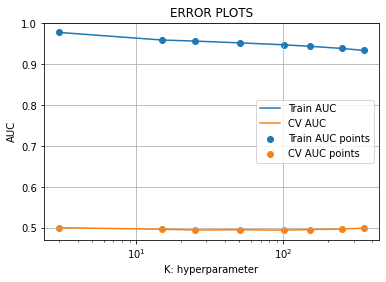

In [ ]:
train_auc = []
cv_auc = []
K = [3, 15, 25, 51, 101,151,251,351]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr, y_train)
    sig_clf = CalibratedClassifierCV(neigh, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    y_train_pred = batch_predict(sig_clf, X_tr)   
    #print(len(y_train_pred))
    y_cv_pred = batch_predict(sig_clf, X_cr)
    #print(len(y_cv_pred))
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
best_K = K[np.argmax(cv_auc)]
print("n_neighbors: ", best_K)
plt.semilogx(K, train_auc, label='Train AUC')
plt.semilogx(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### tested on best hyperparameter on KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_K, n_jobs=-1)
neigh.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(neigh, method="sigmoid")
sig_clf.fit(X_tr, y_train)


# f1_score for train data
train_pred = sig_clf.predict(X_tr)
train_f1_knn = f1_score(y_train, train_pred, average='weighted')
print("train f1_score: ", train_f1_knn)

# f1_score for cv data
cv_pred = sig_clf.predict(X_cr)
cv_f1_knn = f1_score(y_cv, cv_pred, average='weighted')
print("cv f1_score: ", cv_f1_knn)

# f1_score for test data
test_pred = sig_clf.predict(X_te)
test_f1_knn = f1_score(y_test, test_pred, average='weighted')
print("test f1_score: ", test_f1_knn)


train f1_score:  0.9221906775580195
cv f1_score:  0.7066867220010705
test f1_score:  0.7073212310145373


#### Confusion matrix, precision matrix and recall matrix

-------------------- Confusion matrix --------------------


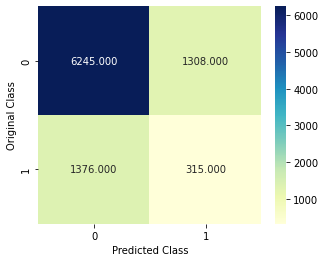

-------------------- Precision matrix (Columm Sum=1) --------------------


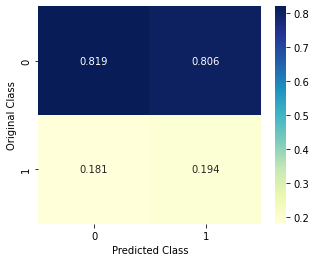

-------------------- Recall matrix (Row sum=1) --------------------


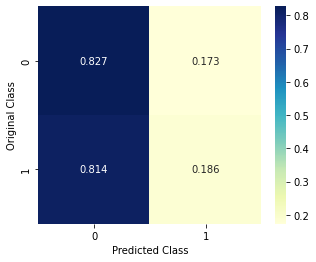

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(5,4))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(5,4))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(5,4))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
plot_confusion_matrix(y_test,test_pred)

### 8.2 Appling Logistic Regression

#### Hyper parameter Tuning

100%|██████████| 12/12 [00:15<00:00,  1.30s/it]


C:  75


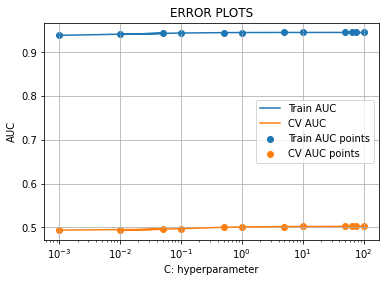

In [ ]:
train_auc = []
cv_auc = []
C=[0.001,0.05,0.01,0.1,0.5,1,5,10,50, 65, 75, 100]
for i in tqdm(C):
    lr = LogisticRegression(C=i, penalty='l2', class_weight='balanced')
    lr.fit(X_tr, y_train)
    
    sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
    sig_clf.fit(X_tr, y_train)
    #y_train_pred=sig_clf.predict_proba(X_tr)
    #y_cv_pred=sig_clf.predict_proba(X_cr)
    
    y_train_pred = batch_predict(sig_clf, X_tr)   
    #print(len(y_train_pred))
    y_cv_pred = batch_predict(sig_clf, X_cr)
    #print(len(y_cv_pred))
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
best_C = C[np.argmax(cv_auc)]
print("C: ", best_C)
plt.semilogx(C, train_auc, label='Train AUC')
plt.semilogx(C, cv_auc, label='CV AUC')

plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### tested on best hyperparameter on LogisticRegression

In [ ]:
lr = LogisticRegression(C=best_C, penalty='l2', class_weight='balanced')
lr.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(lr, method="sigmoid")
sig_clf.fit(X_tr, y_train)

# f1_score for train data
train_pred = sig_clf.predict(X_tr)
train_f1_lr = f1_score(y_train, train_pred, average='weighted')
print("train f1_score: ", train_f1_lr)

# f1_score for cv data
cv_pred = sig_clf.predict(X_cr)
cv_f1_lr = f1_score(y_cv, cv_pred, average='weighted')
print("cv f1_score: ", cv_f1_lr)

# f1_score for test data
test_pred = sig_clf.predict(X_te)
test_f1_lr = f1_score(y_test, test_pred, average='weighted')
print("test f1_score: ", test_f1_lr)

train f1_score:  0.8925488094441233
cv f1_score:  0.7010771984107881
test f1_score:  0.6998305059813393


#### Confusion matrix, precision matrix and recall matrix

-------------------- Confusion matrix --------------------


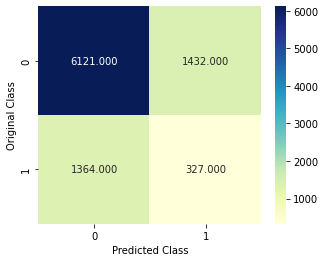

-------------------- Precision matrix (Columm Sum=1) --------------------


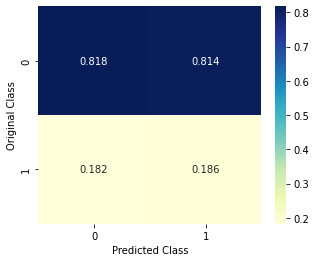

-------------------- Recall matrix (Row sum=1) --------------------


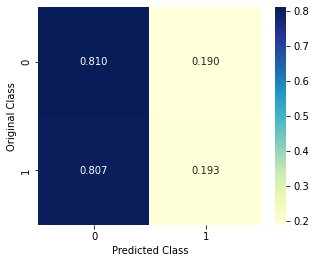

In [ ]:
plot_confusion_matrix(y_test,test_pred)

### 8.3 Appling Multinomial Naive Bayes

#### Hyper parameter Tuning

Fitting 5 folds for each of 8 candidates, totalling 40 fits
best alpha for given dataset 100
tested hyperparameter [1e-05 0.0001 0.001 0.1 1 10 100 1000]


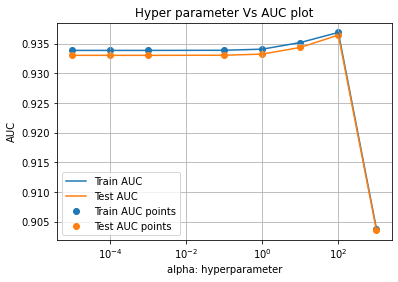

In [ ]:
nb=MultinomialNB(fit_prior=True, class_prior= None)
param_grid= {"alpha": [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}


clf=GridSearchCV(nb, param_grid, cv=5, scoring='roc_auc', verbose=1, return_train_score=True)
clf.fit(X_tr, y_train)
nb_hyp=clf.best_params_['alpha']
print("best alpha for given dataset",nb_hyp)
train_auc=clf.cv_results_['mean_train_score']

cv_auc=clf.cv_results_['mean_test_score'] 

alpha =  clf.cv_results_['param_alpha']
print("tested hyperparameter",alpha)

#results = pd.DataFrame.from_dict(clf.cv_results_)
#results = results.sort_values(['param_alpha'])

plt.semilogx(alpha, train_auc, label='Train AUC')

plt.semilogx(alpha, cv_auc, label='Test AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='Test AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

#### tested on best hyperparameter on Multinomial Naive Bayes

In [ ]:
nb = MultinomialNB(fit_prior=True, class_prior= None, alpha= nb_hyp)
nb.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(nb, method="sigmoid")
sig_clf.fit(X_tr, y_train)

# f1_score for train data
train_pred = sig_clf.predict(X_tr)
train_f1_nb = f1_score(y_train, train_pred, average='weighted')
print("train f1_score: ", train_f1_nb)

# f1_score for cv data
cv_pred = sig_clf.predict(X_cr)
cv_f1_nb = f1_score(y_cv, cv_pred, average='weighted')
print("cv f1_score: ", cv_f1_nb)

# f1_score for test data
test_pred = sig_clf.predict(X_te)
test_f1_nb = f1_score(y_test, test_pred, average='weighted')
print("test f1_score: ", test_f1_nb)

train f1_score:  0.8820512130066175
cv f1_score:  0.7028727441608725
test f1_score:  0.7000423049850982


#### Confusion matrix, precision matrix and recall matrix

-------------------- Confusion matrix --------------------


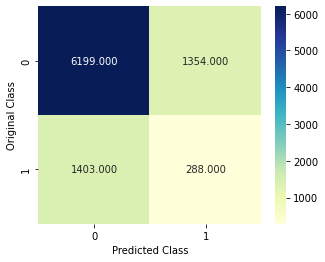

-------------------- Precision matrix (Columm Sum=1) --------------------


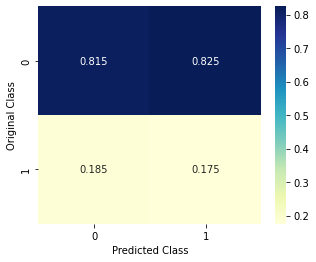

-------------------- Recall matrix (Row sum=1) --------------------


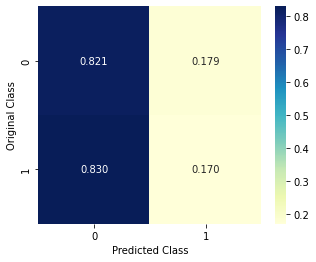

In [ ]:
plot_confusion_matrix(y_test,test_pred)

### 8.4 Appling RBF-SVM

#### Hyper parameter Tuning

In [ ]:
import plotly.graph_objs as go
from chart_studio import plotly
import plotly.offline as offline
rbf_svm=SVC(kernel ='rbf')
param_grid= {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)

clf=GridSearchCV(rbf_svm, param_grid, scoring='roc_auc', cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

clf.fit(X_tr, y_train)

best_hyperparameter = clf.best_params_
rbf_svm_hyp = clf.best_params_

print("best hyperparameter for given dataset",best_hyperparameter)
train_auc=clf.cv_results_['mean_train_score']

cv_auc=clf.cv_results_['mean_test_score'] 

print("AUC Score on this hyperparameter: " ,clf.best_score_)

trace1 = go.Scatter3d(x=param_grid['C'] ,y=param_grid['gamma'], z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=param_grid['C'] ,y=param_grid['gamma'], z=cv_auc, name = 'test')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='C'),
        yaxis = dict(title='gamma'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
plt.show()

Fitting 9 folds for each of 16 candidates, totalling 144 fits
best hyperparameter for given dataset {'C': 10, 'gamma': 0.1}
AUC Score on this hyperparameter:  0.9483162462351936


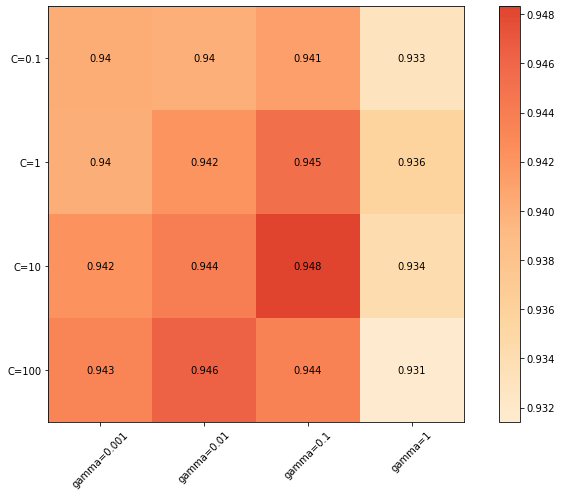

In [ ]:
plt.figure(figsize=(10,7))
plot.grid_search(clf.cv_results_, change=("C", "gamma"))
plt.show()

#### tested on best hyperparameter on RBF-SVM

In [ ]:
rbf_svm = SVC(kernel ='rbf', C=rbf_svm_hyp['C'], gamma=rbf_svm_hyp['gamma'])
rbf_svm.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(rbf_svm, method="sigmoid")
sig_clf.fit(X_tr, y_train)

# f1_score for train data
train_pred = sig_clf.predict(X_tr)
train_f1_rbf_svm = f1_score(y_train, train_pred, average='weighted')
print("train f1_score: ", train_f1_rbf_svm)

# f1_score for cv data
cv_pred = sig_clf.predict(X_cr)
cv_f1_rbf_svm = f1_score(y_cv, cv_pred, average='weighted')
print("cv f1_score: ", cv_f1_rbf_svm)

# f1_score for test data
test_pred = sig_clf.predict(X_te)
test_f1_rbf_svm = f1_score(y_test, test_pred, average='weighted')
print("test f1_score: ", test_f1_rbf_svm)

train f1_score:  0.8950359979458954
cv f1_score:  0.7094220821670658
test f1_score:  0.7060379567091454


#### Confusion matrix, precision matrix and recall matrix

-------------------- Confusion matrix --------------------


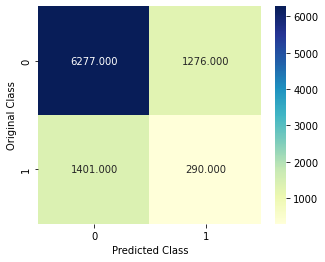

-------------------- Precision matrix (Columm Sum=1) --------------------


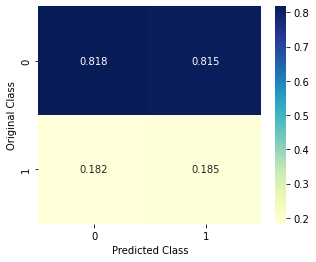

-------------------- Recall matrix (Row sum=1) --------------------


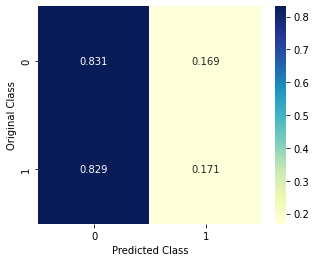

In [ ]:
plot_confusion_matrix(y_test,test_pred)

### 8.5 Appling Random Forest Classifier

#### Hyper parameter Tuning

In [ ]:
rf=RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1)
param_grid= {'n_estimators': [30, 50, 100,200], 'max_depth': [5, 10, 15]}

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=42)

clf=GridSearchCV(rf, param_grid, scoring='roc_auc', cv=cv, verbose=1, return_train_score=True, n_jobs=-1)

clf.fit(X_tr, y_train)

best_hyperparameter = clf.best_params_
rf_hyp = clf.best_params_

print("best hyperparameter for given dataset",best_hyperparameter)
train_auc=clf.cv_results_['mean_train_score']

cv_auc=clf.cv_results_['mean_test_score'] 

print("AUC Score on this hyperparameter: " ,clf.best_score_)

trace1 = go.Scatter3d(x=param_grid['n_estimators'] ,y=param_grid['max_depth'], z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=param_grid['n_estimators'] ,y=param_grid['max_depth'], z=cv_auc, name = 'test')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
plt.show()

Fitting 9 folds for each of 12 candidates, totalling 108 fits
best hyperparameter for given dataset {'max_depth': 10, 'n_estimators': 200}
AUC Score on this hyperparameter:  0.9534451986170467


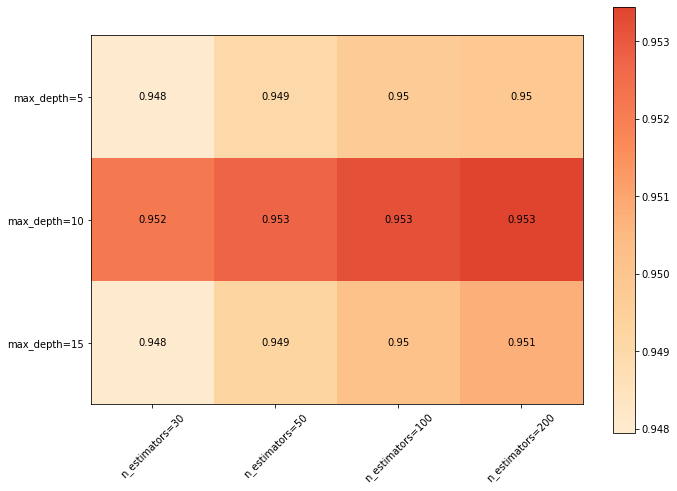

In [ ]:
#from sklearn_evaluation import plot
plt.figure(figsize=(10,7))
plot.grid_search(clf.cv_results_, change=("n_estimators", "max_depth"))
plt.show()

#### tested on best hyperparameter on Random Forest Classifier

In [ ]:
rf=RandomForestClassifier(criterion='gini', random_state=42, n_estimators=rf_hyp['n_estimators'],max_depth=rf_hyp['max_depth'], n_jobs=-1)
rf.fit(X_tr, y_train)
sig_clf = CalibratedClassifierCV(rf, method="sigmoid")
sig_clf.fit(X_tr, y_train)

# f1_score for train data
train_pred = sig_clf.predict(X_tr)
train_f1_rf = f1_score(y_train, train_pred, average='weighted')
print("train f1_score: ", train_f1_rf)

# f1_score for cv data
cv_pred = sig_clf.predict(X_cr)
cv_f1_rf = f1_score(y_cv, cv_pred, average='weighted')
print("cv f1_score: ", cv_f1_rf)

# f1_score for test data
test_pred = sig_clf.predict(X_te)
test_f1_rf = f1_score(y_test, test_pred, average='weighted')
print("test f1_score: ", test_f1_rf)

train f1_score:  0.9199043547143118
cv f1_score:  0.7056057926491253
test f1_score:  0.7048398386540082


#### Confusion matrix, precision matrix and recall matrix

-------------------- Confusion matrix --------------------


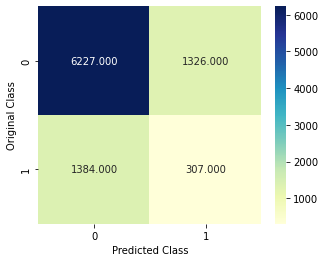

-------------------- Precision matrix (Columm Sum=1) --------------------


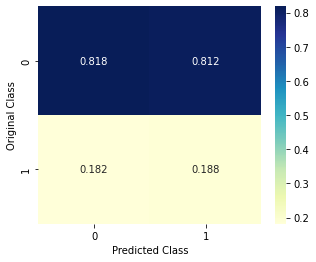

-------------------- Recall matrix (Row sum=1) --------------------


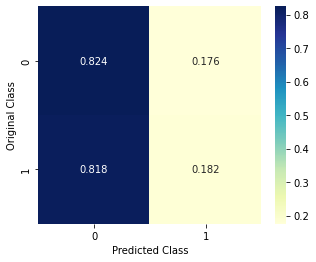

In [ ]:
plot_confusion_matrix(y_test,test_pred)

### 8.6 Appling XGBClassifier

#### Hyper parameter Tuning

In [ ]:
# with X-axis as n_estimators, Y-axis as learning_rate, and Z-axis as AUC Score 

xgb = XGBClassifier()

parameters = {'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators': [5,10,50, 100, 200]}

clf = GridSearchCV(xgb, parameters, cv= 5, scoring='roc_auc', return_train_score = True,n_jobs = -1)


clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']

cv_auc = clf.cv_results_['mean_test_score'] 


xgb_hyp = clf.best_params_

print("best hyperparameter: ", clf.best_params_)
print("AUC Score on this hyperparameter: " ,clf.best_score_)

trace1 = go.Scatter3d(x=parameters['n_estimators'] ,y=parameters['learning_rate'], z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=parameters['n_estimators'] ,y=parameters['learning_rate'], z=cv_auc, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='learning_rate'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')
#fig.show()
plt.show()


best hyperparameter:  {'learning_rate': 0.1, 'n_estimators': 100}
AUC Score on this hyperparameter:  0.9544865812387912


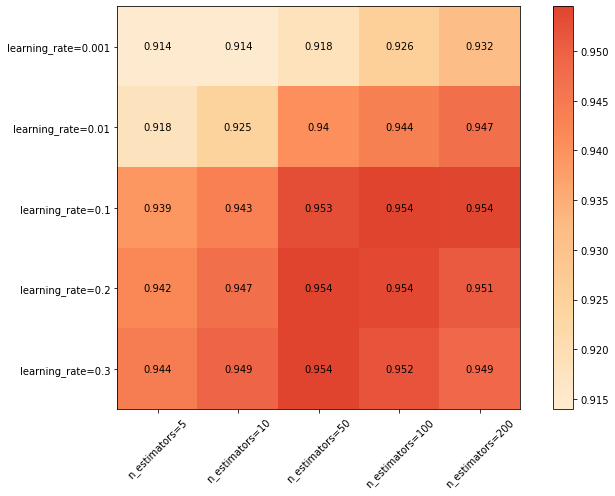

In [ ]:
#from sklearn_evaluation import plot
plt.figure(figsize=(10,7))
plot.grid_search(clf.cv_results_, change=("n_estimators", "learning_rate"))
plt.show()

#### tested on best hyperparameter on XGBClassifier

In [ ]:
xgb = XGBClassifier(learning_rate=xgb_hyp['learning_rate'], n_estimators=xgb_hyp['n_estimators'])
xgb.fit(X_tr, y_train)

# f1_score for train data
train_pred = xgb.predict(X_tr)
train_f1_xgb = f1_score(y_train, train_pred, average='weighted')
print("train f1_score: ", train_f1_xgb)

# f1_score for cv data
cv_pred = xgb.predict(X_cr)
cv_f1_xgb = f1_score(y_cv, cv_pred, average='weighted')
print("cv f1_score: ", cv_f1_xgb)

# f1_score for test data
test_pred = xgb.predict(X_te)
test_f1_xgb = f1_score(y_test, test_pred, average='weighted')
print("test f1_score: ", test_f1_xgb)

train f1_score:  0.9019221904324374
cv f1_score:  0.7077895852958126
test f1_score:  0.7061629697266513


#### Confusion matrix, precision matrix and recall matrix

-------------------- Confusion matrix --------------------


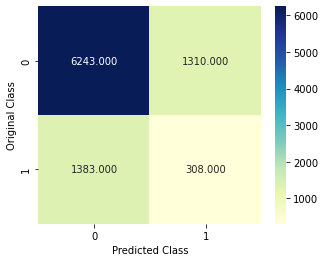

-------------------- Precision matrix (Columm Sum=1) --------------------


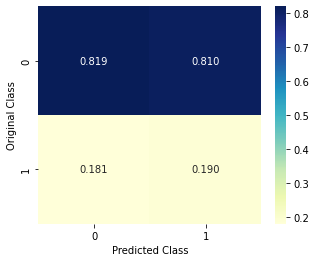

-------------------- Recall matrix (Row sum=1) --------------------


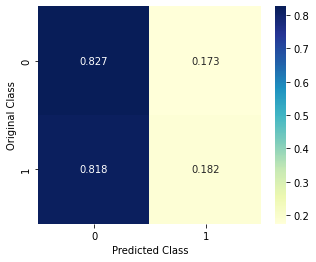

In [ ]:
plot_confusion_matrix(y_test,test_pred)

# Summary

In [158]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "Hyperparameter", "f1_score"]

x.add_row(["KNeighborsClassifier", best_K , test_f1_knn])
x.add_row(["Logistic Regressin", best_C, test_f1_lr])
x.add_row(["Multinomial Naive Bayes", nb_hyp, test_f1_nb])
x.add_row(["RBF-SVM", rbf_svm_hyp, test_f1_rbf_svm])
x.add_row(["RandomForestClassifier", rf_hyp, test_f1_rf])
x.add_row(["XGBClassifier", xgb_hyp, test_f1_xgb])
print(x)

+-------------------------+---------------------------------------------+--------------------+
|          Model          |                Hyperparameter               |      f1_score      |
+-------------------------+---------------------------------------------+--------------------+
|   KNeighborsClassifier  |                      3                      | 0.7073212310145373 |
|    Logistic Regressin   |                      75                     | 0.6998305059813393 |
| Multinomial Naive Bayes |                     100                     | 0.7000423049850982 |
|         RBF-SVM         |           {'C': 10, 'gamma': 0.1}           | 0.7060379567091454 |
|  RandomForestClassifier |    {'max_depth': 10, 'n_estimators': 200}   | 0.7048398386540082 |
|      XGBClassifier      | {'learning_rate': 0.1, 'n_estimators': 100} | 0.7061629697266513 |
+-------------------------+---------------------------------------------+--------------------+
